# 1.Import and store the data in a data frame. (2.5 points)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
air = pd.read_excel('airq402.xlsx')
air.head()

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare,Low_price_airline,market_share.1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [55]:
air.columns

Index(['City1', 'City2', 'Average_Fare', 'Distance',
       'Average_weekly_passengers', 'market_leading_airline', 'market_share',
       'Average_fare ', 'Low_price_airline', 'market_share.1', 'price'],
      dtype='object')

In [56]:
air.isnull().any()

City1                        False
City2                        False
Average_Fare                 False
Distance                     False
Average_weekly_passengers    False
market_leading_airline       False
market_share                 False
Average_fare                 False
Low_price_airline            False
market_share.1               False
price                        False
dtype: bool

In [57]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Average_Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average_weekly_passengers    1000 non-null float64
market_leading_airline       1000 non-null object
market_share                 1000 non-null float64
Average_fare                 1000 non-null float64
Low_price_airline            1000 non-null object
market_share.1               1000 non-null float64
price                        1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [107]:
air.describe()

,Average_Fare,Distance,Average_weekly_passengers,market_share,Average_fare,market_share.1,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


# 2.Remove the outliers from the data (5 points)

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

# Quantile Method -> To remove Outliers

In [59]:
Q1 = air.quantile(0.25)
Q3 = air.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Average_Fare                  71.4175
Distance                     899.0000
Average_weekly_passengers    512.7150
market_share                  27.0000
Average_fare                  78.8925
market_share.1                39.7775
price                         54.7625
dtype: float64


In [60]:
air.shape

(1000, 11)

In [61]:
airo = air[~((air < (Q1 - 1.5 * IQR)) |(air > (Q3 + 1.5 * IQR))).any(axis=1)]
airo.shape

(885, 11)

In [62]:
#airo -> New dataset with outliers removed
airo.head()

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare,Low_price_airline,market_share.1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


# 3.Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)

In [63]:
# Copy all the independent/predictor variables into X dataframe. Since 'Average_Fare' is dependent variable drop it
X = airo.drop('Average_Fare', axis=1)

# Copy the 'Average_Fare' column alone into the y dataframe. This is the dependent variable
Y = airo[['Average_Fare']]


In [64]:
X.head()

,City1,City2,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare,Low_price_airline,market_share.1,price
0,CAK,ATL,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [65]:
Y.head()

,Average_Fare
0,114.47
1,122.47
2,214.42
3,69.40
4,158.13


# 4.Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

In [66]:
airo.corr()

,Average_Fare,Distance,Average_weekly_passengers,market_share,Average_fare,market_share.1,price
Average_Fare,1.000000,0.522650,-0.197005,-0.207955,0.979713,-0.493555,0.840993
Distance,0.522650,1.000000,-0.129632,-0.547952,0.489721,-0.361519,0.539894
Average_weekly_passengers,-0.197005,-0.129632,1.000000,0.021769,-0.163736,0.076176,-0.209018
market_share,-0.207955,-0.547952,0.021769,1.000000,-0.193382,0.281182,-0.314555
Average_fare,0.979713,0.489721,-0.163736,-0.193382,1.000000,-0.519442,0.794157
market_share.1,-0.493555,-0.361519,0.076176,0.281182,-0.519442,1.000000,-0.260912
price,0.840993,0.539894,-0.209018,-0.314555,0.794157,-0.260912,1.000000


In [67]:
import warnings 
warnings.filterwarnings('ignore')

In [68]:
# Average_weekly_passengers,market_share and market_share.1 have less than 0.1 correlation with dependent variable.
airo.drop(['Average_weekly_passengers','market_share','market_share.1',],axis=1,inplace=True)
airo.head()

,City1,City2,Average_Fare,Distance,market_leading_airline,Average_fare,Low_price_airline,price
0,CAK,ATL,114.47,528,FL,111.03,FL,111.03
1,CAK,MCO,122.47,860,FL,123.09,DL,118.94
2,ALB,ATL,214.42,852,DL,223.98,CO,167.12
3,ALB,BWI,69.40,288,WN,68.86,WN,68.86
4,ALB,ORD,158.13,723,UA,161.36,WN,145.42


In [69]:
# Dropped the independent variables which has less than 0.1 correlation with the dependent variable
airo.corr()

,Average_Fare,Distance,Average_fare,price
Average_Fare,1.000000,0.522650,0.979713,0.840993
Distance,0.522650,1.000000,0.489721,0.539894
Average_fare,0.979713,0.489721,1.000000,0.794157
price,0.840993,0.539894,0.794157,1.000000


# 5.Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)

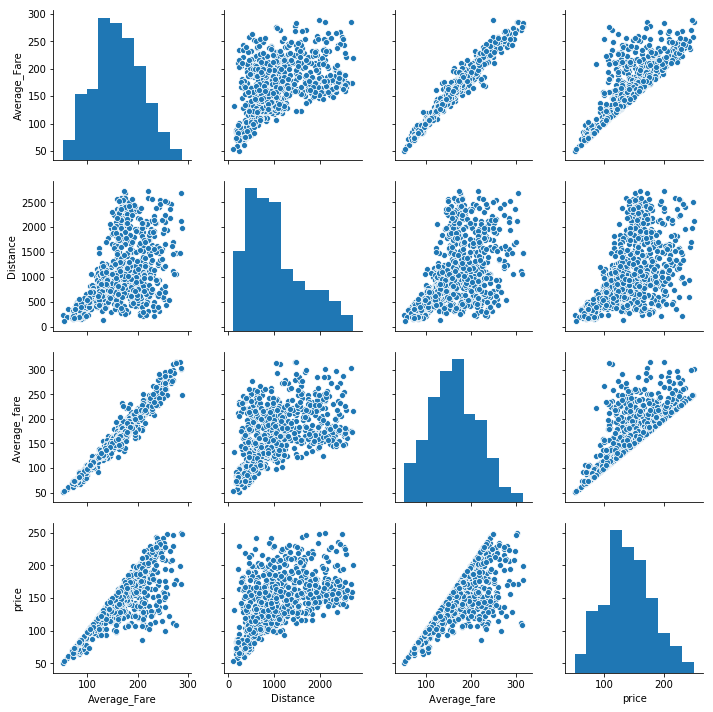

In [88]:
sns.pairplot(airo, kind="scatter")

# 6.Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [91]:
airo.drop(['City1','City2','market_leading_airline','Low_price_airline',],axis=1,inplace=True)

In [92]:
# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries

from sklearn import preprocessing

# scale all the columns of the airo (dataframe) This will produce a numpy array
airo_scaled = preprocessing.scale(airo)

In [93]:
airo_scaled

array([[-0.94592578, -0.83168393, -0.96810169, -0.73821466],
       [-0.78077815, -0.29173826, -0.74165636, -0.53960701],
       [ 1.11738752, -0.304749  ,  1.15271093,  0.67011692],
       ...,
       [-0.00664859, -0.36655001, -0.05518527,  0.46673867],
       [-1.79024309, -1.40740913, -1.67391263, -1.68204037],
       [-0.69407564, -0.2933646 , -0.61341244, -0.46428174]])

In [94]:
#convert the numpy array back into a dataframe 

airo_scaled = pd.DataFrame(airo_scaled, columns=airo.columns)

In [95]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [96]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [99]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.9736359705146775

In [103]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [104]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

7.984855966529907

# 7.Print the coefficients & intercepts of the linear regression model (5 points)

In [97]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Distance is 0.0029050601559945976
The coefficient for Average_weekly_passengers is -0.0036000963955034604
The coefficient for market_share is 0.08469292566835171
The coefficient for Average_fare  is 0.7316262128158858
The coefficient for market_share.1 is -0.030826618625306293
The coefficient for price is 0.23035474647497675


In [98]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.415263143189776


In [101]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

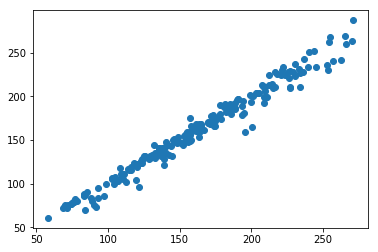

In [102]:
plt.scatter(y_test, y_pred)

# 8.Print the accuracy of the overall model (2.5 points)

In [105]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS
# Accuracy is defined for discrete values (classes). 
#Its defined as the fraction of correct predictions from total predictions made.
#Its not advised to calculate accuracy for continuous values. 
#For such values you would want to calculate a measure of how close the predicted values are to the true values. 
#This task of prediction of continuous values is known as regression.

regression_model.score(X_test, y_test)

0.9736359705146775

In [ ]:
# So the model explains 97.36% of the variability in Y using X 